# Data Mining - Homework 4
## Mohammad Bahrami - 9724133
### Question 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Preprocessing

In [2]:
dataset = pd.read_csv('Wholesale customers data.csv')
dataset.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There are no `Nan` Values in the dataset.

In [3]:
numeric_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
dataset.loc[:, numeric_columns] = dataset.loc[:, numeric_columns].apply(
    lambda z: (z - z.mean()) / z.std()
)

In [4]:
dataset = dataset.drop(
    index=dataset.loc[((dataset.loc[:, numeric_columns] > 3) | (dataset.loc[:, numeric_columns] < -3)).any(axis=1)].index
).reset_index(drop=True)

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2).fit(dataset)
tsne_df = pd.DataFrame(tsne.embedding_)

/home/indirected/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/indirected/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


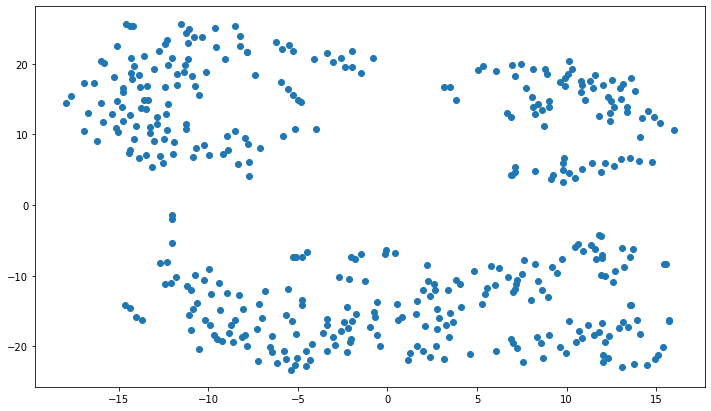

In [6]:
fig, ax = plt.subplots()
ax.scatter(
    tsne_df.loc[:, 0],
    tsne_df.loc[:, 1],
)
fig.set_size_inches((12, 7))

#### DBSCAN

In [11]:
from sklearn.cluster import DBSCAN
clusterer = DBSCAN().fit(tsne_df)

In [12]:
np.all(clusterer.labels_ == -1)
# No Clustering at all

True

In [13]:
mesh = np.meshgrid(
    np.arange(0.1, 5, 0.01), # eps values
    np.arange(1, 15) # min_samples values
)
params = np.stack(
    (
        np.concatenate(mesh[0]),
        np.concatenate(mesh[1])
    ),
    axis=1
)

In [14]:
from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm
s_lis = dict()
for e, ms in tqdm(params):
    clusterer = DBSCAN(eps=e, min_samples=ms).fit(tsne_df)
    if np.unique(clusterer.labels_).shape[0] > 1:
        s_lis[(e, ms)] = silhouette_score(tsne_df, clusterer.labels_, metric='euclidean')
s_lis = pd.Series(s_lis)
optimum_params = s_lis.idxmax()

  0%|          | 0/6860 [00:00<?, ?it/s]

In [15]:
s_lis.max()

0.58520955

In [16]:
optimum_params

(3.3899999999999983, 1.0)

In [17]:
best_clusterer = DBSCAN(
    eps=optimum_params[0],
    min_samples=optimum_params[1]
).fit(tsne_df)
clusters = best_clusterer.labels_

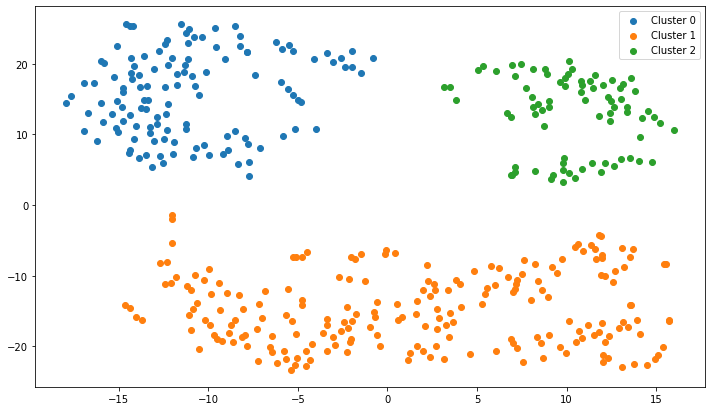

In [18]:
fig, ax = plt.subplots()
for c in np.unique(clusters):
    condition = clusters==c
    ax.scatter(
        tsne_df.loc[condition, 0],
        tsne_df.loc[condition, 1],
        label=f'Cluster {c}'
    )
ax.legend()
fig.set_size_inches((12, 7))

In [19]:
print(f'Best Score: {s_lis.max():.4f} at eps: {optimum_params[0]:.2f} and min_samples: {optimum_params[1]}')

Best Score: 0.5852 at eps: 3.39 and min_samples: 1.0


The `eps` parameter sets the required density within a cluster. In other words, it defines the radius that we measure the density for the cluster.